In [65]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [66]:
df = pd.read_csv('Analyzed_Data.csv') 
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
1,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
2,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
3,6,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
4,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


In [67]:
df = shuffle(df)
df.shape

(100000, 12)

In [68]:
x = df.drop(['id', 'Response'], axis=1)
y = df.Response
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=100, test_size=0.2)

In [69]:
x_train.shape

(80000, 10)

In [70]:
y_train.shape

(80000,)

In [71]:
x_test.shape

(20000, 10)

In [72]:
y_test.shape

(20000,)

In [73]:
lr = LogisticRegression() 
lr.fit(x_train,y_train)	
Train_accuracy=accuracy_score (y_train, lr.predict(x_train))
Test_accuracy=accuracy_score (y_test,lr.predict(x_test))
print('Train_accuracy: ', Train_accuracy )
print('Test_accuracyz: ', Test_accuracy)

Train_accuracy:  0.7635375
Test_accuracyz:  0.7619


In [74]:
params ={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001,0.01, 0.1,1.0,10,100]}


In [76]:
grid_lr = RandomizedSearchCV(lr, param_distributions=params, n_jobs=-1, cv=3, scoring='accuracy') 
grid_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10,
                                              100],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [77]:
grid_lr.best_params_

{'penalty': 'l2', 'C': 0.001}

In [78]:
f_lr = LogisticRegression(penalty= 'l2',C=0.001) 
f_lr.fit(x_train,y_train)

LogisticRegression(C=0.001)

In [79]:
y_pred=f_lr.predict(x_test)

In [80]:
print('Train_accuracy: ', Train_accuracy)
print('Test_accuracyz: ', Test_accuracy)

Train_accuracy:  0.7635375
Test_accuracyz:  0.7619


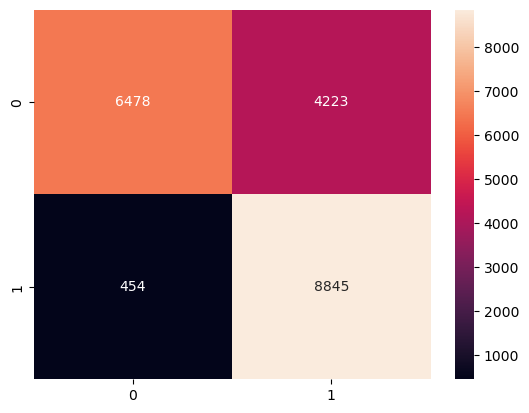

In [81]:
cm=confusion_matrix (y_test,y_pred)
cm=pd.DataFrame(data=cm, columns=[0,1], index=[0,1])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [82]:
f1_score(y_test,y_pred)

0.7908973040640229

In [114]:
np.array(x_test)[1]

array([0.00e+00, 6.10e+01, 1.00e+00, 4.80e+01, 0.00e+00, 0.00e+00,
       1.00e+00, 2.63e+03, 1.22e+02, 3.70e+01])

In [115]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
60457,58250,1,36,1,33.0,0,0,1,2630.0,124.0,144,1
40131,45723,1,62,1,39.0,1,0,1,41065.0,26.0,34,0
92268,317031,1,50,1,50.0,0,0,1,2630.0,157.0,89,1
56051,22262,0,61,1,29.0,1,0,1,27071.0,124.0,18,1
75120,177730,1,28,1,28.0,0,0,1,2630.0,156.0,62,1


In [110]:
f_lr.predict(np.array(x_test) [1].reshape(1,-1))[0]

1

In [112]:
y_test.head()

81621    1
78628    1
39540    0
55174    1
48708    0
Name: Response, dtype: int64

In [113]:
y_test.shape

(20000,)